## K-mean Clustering

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
import pandas as pd
import numpy as np
import glob
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS 
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
import string
from nltk.tokenize import sent_tokenize
df = pd.read_csv("Reviews.csv")
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dlatl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dlatl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dlatl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [2]:


words = df['Text'].to_string()

#tokenized_words=word_tokenize(text_lower)

# lemmatizing words based on contexts and usage of words in sentences
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]


# Removing punctuations, which contain '?', '' and '!'
punctuations= dict((ord(punctuation), None) for punctuation in string.punctuation)


#filtered_tokens_final=[]
#for i in filtered_tokens:
    #if i not in punctuations:
        #filtered_tokens_final.append(i)

def filtered_token_final(text):
  text_lower = text.lower().translate(punctuations) # converting text into lower case and removing punctuations
  tokenized_words=word_tokenize(text_lower) # tokenizing words
  return LemTokens(tokenized_words) # Lemmatizing tokenzied words

tfidf_vectorizer = TfidfVectorizer(stop_words='english' , ngram_range=(1,2), 
                             tokenizer = filtered_token_final, min_df=0.05, max_df=0.85)

# TfidfVectorizer
feature_vect = tfidf_vectorizer.fit_transform(df['Text'])

c:\Users\dlatl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\dlatl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [3]:
from sklearn.cluster import KMeans

# will split data into three clusters.
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)

# cluster label and centers 
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# Add 'cluster_label' column
df['cluster_label'] = cluster_label
df.sample(5)

c:\Users\dlatl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cluster_label
106859,106860,B003185UA8,A1N4NAIHZF4J7X,"Dawndy12 ""Barely Surviving The Loss of My Dau...",0,3,1,1309564800,UNUSEABLE!!! ESP FOR SMALL DOGS!,I CANT REVIEW THIS FOOD...BECAUSE THE KIBBLE S...,2
402683,402684,B003P9XFVO,ABSRV00QLMXTJ,portkey,1,1,5,1326672000,Grain allergic pup.,I have a pup (8lb poodle) who is allergic to g...,2
417426,417427,B002OK6E6I,A39RYGC3QKBG82,Brad,0,0,5,1320883200,What do you mean it's not peanut butter?,"My wife has a peanut allergy, so making sandwi...",2
90137,90138,B00866AM2G,A3OKDH6S03GF4H,S. Gundimeda,0,0,5,1252627200,Its pretty good,My wife and I enjoyed this Coconut drink...its...,2
142807,142808,B0038B1DEU,A24PB3TBHZI7HO,"Nicole Milazzo ""Nicole M""",1,1,5,1324944000,Love it!!!,I've tried many diff kinds of green powder and...,2


In [4]:
df[df['cluster_label']==0].sort_values(by='Text')

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cluster_label
126462,126463,B004569PAG,A3LHF3RUAS4WLC,Leonid,1,1,5,1329868800,unique and robust,"""...smoothly blends the high notes of a high g...",0
333019,333020,B0000CFXYA,A1S6LV2XO6EN3B,"KuddlKat ""Techie""",1,2,2,1277769600,"""Tins"" means Tins, not envelopes","""6 Tins"" arrived as 1 tin wrapped in paper and...",0
341865,341866,B0017WO2JK,A230CAH5O7B9FQ,Melissa,0,0,2,1340236800,What flavor?,"""A delicate tea with enticing hints of blueber...",0
375986,375987,B0000DBN1I,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",0,0,5,1074988800,Peaceful Thoughts...,"""A single cup of Tazo Calm has been known to h...",0
540656,540657,B001D0GV90,A33RONBC0EU0A2,Pete Zar,2,3,5,1289433600,For Real Coffee Lovers Only,"""DO NOT BUY THIS ITEM""... UNLESS...... you can...",0
...,...,...,...,...,...,...,...,...,...,...,...
165926,165927,B0009F3SA0,A3ACO0LANLBE1Z,"mac cam ""macmom""",1,1,5,1264809600,love yogi tea,yogi teas are the best tasting tea i have ever...,0
208841,208842,B000E8Y5D6,A6F6Z1T9OZK8M,david olenick,0,12,1,1163808000,o expensive,you can buy lipton for less than 4.00 / 6 oz a...,0
548580,548581,B000LKXRIQ,A1264Q1DKK4BZ7,twiggy2theinfinitepower,1,1,5,1326931200,If you like jasmin green tea...,you will LOVE this tea. It's been a long time ...,0
119998,119999,B000CMF18W,AZ31S5ACWRY15,Tosha,1,1,4,1303516800,If you like black licorice ......,you'll like the way this tea tastes. I don't ...,0


The first cluster is mainly associated with reviews about tea businesses. 

In [5]:
df[df['cluster_label']==1].sort_values(by='Text')

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cluster_label
354033,354034,B001A4B8EM,APQ50DQHSNYFR,Ryan Kirk,79,79,1,1283644800,Amazon should be ashamed to even carry this.,"""2% Kopi Luwak"" That's the key part in the de...",1
157070,157071,B002TMV3GC,A2DSXA1E02C86D,Joseph Haschka,0,0,3,1310256000,Where's the romance?,"""A European classic. Sweet caramel and rich va...",1
484179,484180,B0002AHT8E,A3UDAKM6LSHINQ,katyc,0,0,5,1338854400,Greek Coffee,"""Bravo"" Greek Coffee has the perfect color, ar...",1
124338,124339,B005ZBZM52,A2QTB6RFY12WGQ,Tuseline Goldstein,2,2,5,1323648000,Organic never tasted better!,"""By far the best cup of coffee ever!!!"". I rec...",1
440232,440233,B005ZBZLSU,A2QTB6RFY12WGQ,Tuseline Goldstein,1,2,5,1323648000,Looooove It!,"""By far the best cup of coffee ever!!!"". I rec...",1
...,...,...,...,...,...,...,...,...,...,...,...
147551,147552,B001D0IZBM,A2JEQBO69YNGGP,saraht,0,0,5,1350950400,best buy around,you can't beat the price for this coffee. You ...,1
109208,109209,B004AW5THI,A38H6PHZ1A0V26,utahsand,1,1,5,1343347200,awesome supplier,you realy cant beat the deal on coffee they of...,1
453763,453764,B00634YDEQ,A3Q9OI1LGJUW2G,"Jean Porter ""Jean Porter""",0,0,5,1343779200,great,your services were quick and as always the cof...,1
99757,99758,B001ELLAH6,A20CTKKZEQGD3E,"Akua Grant ""Akua Rising""",1,2,1,1262131200,Caffeen Addicts Need Not Apply,zzzzzzz. I had high hopes for this coffee and ...,1


The second cluster may be associated with coffee businesses. 

In [6]:
df[df['cluster_label']==2].sort_values(by='Text')

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cluster_label
472747,472748,B000UXH9X8,A1B1Z0MDQ1YACN,Ronald E. Corbin,0,0,1,1345680000,sugar,! think I just ruined my dish. open this and p...,2
366022,366023,B0053TENTW,A3JG5OT0Z5Q1KE,Royal,2,2,1,1325894400,!!! FALSE ADVERTISEMENT !!!,!!! PRODUCT HAS NOTHING TO DO WITH MARVEL!!! F...,2
240425,240426,B001VJ0B0I,A1I6U5AQAT3ZG9,"E. B. MULLIGAN ""Bronwyn""",1,3,3,1342828800,Garlic oil? I thought Garlic was bad for dogs ...,!!!<br />Animal digest? She does that on her o...,2
502792,502793,B000V9ANUW,ALSAOZ1V546VT,"A Research It Maven ""Just the facts please""",1,1,5,1256688000,TWO big candy bars in EACH Package!,"!!HEY, these are BIG! There are actually two c...",2
386401,386402,B002UQBL9Q,A35PQDX1R6IG9E,Lost In The Cosmos,4,5,3,1330905600,There's a reason the description doesn't list ...,""" WITH "" ... Olive Oil. What does this mean...",2
...,...,...,...,...,...,...,...,...,...,...,...
563869,563870,B007JFMH8M,AES9VNGFZLOE1,Alexis McHenry,1,2,5,1342483200,Quaker Soft Baked Oatmeal Cookies,"~ Quick Take: Tasty, chewy, soft-baked cookies...",2
268111,268112,B001E6GFR6,A2FOR1IJSX76LQ,Sly,0,3,5,1282003200,"Yummy. yummy, yummy!!!",~<br /><br />These are soooooooooooooooooooooo...,2
61192,61193,B000FA38ZY,A26UNIPEVYE9DE,Becker,0,0,4,1320192000,PURE CHOCOLATE MALLOMARS COOKIES,~<br />This is a `3 for the price of 1' review...,2
527926,527927,B000VKADRY,A2CEDG8O4AYV8K,Diane A. Shultz,0,0,5,1211846400,Earth's Best Soy Baby Formula,"~Earth's Best Infant Formula Soy Iron, 13.2-Ou...",2


Lastly, third cluster is associated with reviews for foods. 

## Topic Modelling

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

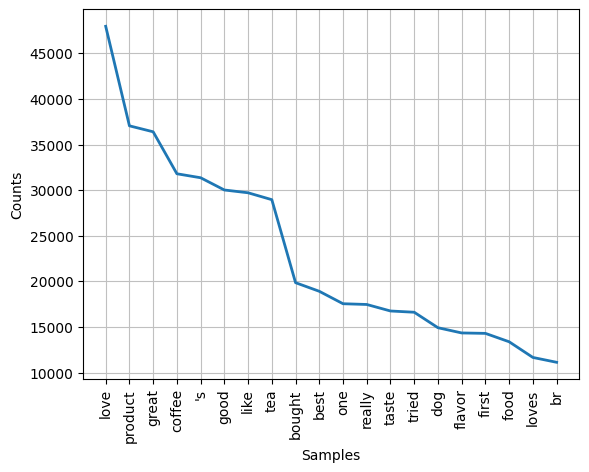

[('love', 47961), ('product', 37050), ('great', 36396), ('coffee', 31796), ("'s", 31359), ('good', 30017), ('like', 29711), ('tea', 28955), ('bought', 19856), ('best', 18912), ('one', 17549), ('really', 17467), ('taste', 16753), ('tried', 16616), ('dog', 14919), ('flavor', 14346), ('first', 14299), ('food', 13379), ('loves', 11661), ('br', 11129)]


In [7]:
# Change 'sentence' column data type from object to string
words = df['Text'].to_string()
text_lower = words.lower()
# Only tokenized words that contain lower case letters, as imporatnt words are more likely to be specific nouns. 
tokenized_words=word_tokenize(text_lower)

import string
from nltk.corpus import stopwords
#stopwords "english" contains many subjective and objective words such as 'i', 'myself' and 'you'.
stop_words=stopwords.words("english")
print(stop_words)
# Adding more unnecessary words into stop_words. 
stop_words.extend(["get","need", "s", "a", "the", "I", "What", "Is", "How", "n't", "Will", "Can", "Does", "Are", "If", "The", "'ve", "'m", "j", "th", "go",])

filtered_tokens = []
for i in tokenized_words:
  if i not in stop_words:
    filtered_tokens.append(i)

# punctuations, which contain '?', '' and '!'
punctuations=list(string.punctuation)
#Add custom punctuations to the list
punctuations.append("...")
punctuations.append("?")

#Create a variable that include all filtered tokenized words. 
filtered_tokens_final=[]
for i in filtered_tokens:
    if i not in punctuations:
        filtered_tokens_final.append(i)

all_words=nltk.FreqDist(filtered_tokens_final)
all_words.plot(20);
print(all_words.most_common(20))


In [8]:
filtered_tokens_final2 = [filtered_tokens_final]


# Topic modelling
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
dictionary = gensim.corpora.Dictionary(filtered_tokens_final2)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokens_final2]

# Build LDA model
num_topics = 5
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.001*"great" + 0.000*"love" + 0.000*"product" + 0.000*"'s" + 0.000*"tea" + 0.000*"like" + 0.000*"coffee" + 0.000*"good" + 0.000*"bought" + 0.000*"one"

Topic: 1 
Words: 0.001*"love" + 0.001*"great" + 0.001*"product" + 0.001*"coffee" + 0.001*"'s" + 0.001*"like" + 0.001*"good" + 0.001*"bought" + 0.001*"tea" + 0.001*"taste"

Topic: 2 
Words: 0.001*"love" + 0.001*"product" + 0.001*"'s" + 0.000*"like" + 0.000*"great" + 0.000*"good" + 0.000*"tea" + 0.000*"coffee" + 0.000*"flavor" + 0.000*"bought"

Topic: 3 
Words: 0.001*"love" + 0.000*"great" + 0.000*"product" + 0.000*"'s" + 0.000*"tea" + 0.000*"bought" + 0.000*"coffee" + 0.000*"good" + 0.000*"like" + 0.000*"best"

Topic: 4 
Words: 0.016*"love" + 0.012*"product" + 0.012*"great" + 0.011*"coffee" + 0.011*"'s" + 0.010*"good" + 0.010*"like" + 0.010*"tea" + 0.007*"bought" + 0.006*"best"

